In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [151]:
df = pd.read_csv('./netflix/netflix_titles.csv')
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


### Mandatory Part

- 한국 작품은 총 얼마나 있는가?

    - country column을 기준으로 한다
    - "South Korea"인 경우만 인정한다.("US, South Korea"는 인정하지 않음)

- 한국 작품의 수

In [152]:
len(df[df['country'] == 'South Korea'])

199

### Bonus Part

- 가장 많은 작품이 올라간 국가는 어디이고, 얼마나 많은 작품이 있는가?

    - country column을 기준으로 한다
    - **단일 국가**인 경우를 기준으로 결과를 구해보자

1. 먼저 국가를 기준으로 결과를 구해야 하므로 국가 열중 결측치가 존재하는 행을 삭제한 데이터만을 가지고
2. 단일 국가인 경우만을 필터링

In [153]:
df = df.dropna(subset = ['country'], how='any', axis = 0)
# 국가가 여러개인 경우 country열에 ','구분자로 국가가 구분되어있으므로 ,가 없는 행만을 추출
datafilter = df['country'].str.contains(',')
df = df[datafilter == False]
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
...,...,...,...,...,...,...,...,...,...,...,...,...
8800,s8801,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


- groupby()함수를 사용하여 집계를 진행한다. 집계에는 count()함수를 사용
- 집계한후 작품을 봐야하므로 title열을 선택하고 가장많을 작품을 보기위해 내림차순 정렬을 진행

In [154]:
df.groupby(by = df['country']).count()['title'].sort_values(ascending = False)
# 미국(United States)인 것을 알 수있다.

country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
                  ... 
Namibia              1
Mozambique           1
Mauritius            1
Luxembourg           1
Zimbabwe             1
Name: title, Length: 73, dtype: int64

### Mission 2. 가즈아!

### Mandatory Part

- 다음 데이터가 주어졌을 때 2016.6 ~ 2017.6 기간의 5-MA(Moving Average) 비트코인 가격 그래프를 그려주세요.

     -선의 색깔은 **노란색(#f2a900)** 으로 해야합니다.

    -x-axis label과 y-axis label은 적절한 텍스트로 추가되어야 합니다.

    -이동평균의 기준은 Open Column으로 계산합니다.

    -이외에도 그래프를 알아보기 쉽게 하기 위한 정보(Text, Facet 등)을 추가하는 것도 좋습니다.

- 💡 이동평균(Moving Average)법은 시계열 데이터를 표현하는 데에 많이 사용하는 방법 중 하나입니다

In [155]:
df = pd.read_csv('./bitcoin/Bitcoin.csv',index_col = 0)
# 이동평균 값을 넣어주기 위해 날짜를 기준으로 데이터를 정렬
df = df.sort_values(by = 'Date').reset_index(drop=True)
df

,Date,Open,High,Low,Close,Volume,Market Cap
0,2013-01-05,139.00,139.89,107.72,116.99,8.026719e+06,1542820000
1,2013-01-06,128.81,129.78,127.20,129.30,7.521960e+06,1445800000
2,2013-01-07,97.51,97.66,86.30,88.05,5.759986e+06,1107130000
3,2013-01-08,106.21,108.00,103.01,104.00,6.348195e+06,1220190000
4,2013-01-09,135.14,145.81,134.81,138.34,8.179728e+06,1572230000
...,...,...,...,...,...,...,...
1604,2017-12-05,1845.76,1856.15,1694.01,1724.24,7.409840e+08,30131100000
1605,2017-12-06,2953.22,2997.26,2518.56,2659.63,2.569530e+09,48391200000
1606,2017-12-07,2332.77,2423.71,2275.14,2398.84,1.117410e+09,38355900000
1607,2017-12-08,3650.63,3949.92,3613.70,3884.71,2.219590e+09,60242100000


In [156]:
# 5-ma라는 열을 생성하여 값을 0으로 초기회
# 5-ma열에 이동평균법(5-ma)을 적용하여 값 넣기진행

df['5-ma'] = 0
for i in range(len(df) - 4):
    df['5-ma'].loc[4+i,] = (df['Open'].loc[i,]+df['Open'].loc[i+1,]+df['Open'].loc[i+2,]+df['Open'].loc[i+3,]+df['Open'].loc[i+4,])/5
df
    

C:\Users\User\AppData\Local\Temp\ipykernel_23792\3179990412.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['5-ma'].loc[4+i,] = (df['Open'].loc[i,]+df['Open'].loc[i+1,]+df['Open'].loc[i+2,]+df['Open'].loc[i+3,]+df['Open'].loc[i+4,])/5


,Date,Open,High,Low,Close,Volume,Market Cap,5-ma
0,2013-01-05,139.00,139.89,107.72,116.99,8.026719e+06,1542820000,0.000
1,2013-01-06,128.81,129.78,127.20,129.30,7.521960e+06,1445800000,0.000
2,2013-01-07,97.51,97.66,86.30,88.05,5.759986e+06,1107130000,0.000
3,2013-01-08,106.21,108.00,103.01,104.00,6.348195e+06,1220190000,0.000
4,2013-01-09,135.14,145.81,134.81,138.34,8.179728e+06,1572230000,121.334
...,...,...,...,...,...,...,...,...
1604,2017-12-05,1845.76,1856.15,1694.01,1724.24,7.409840e+08,30131100000,1201.178
1605,2017-12-06,2953.22,2997.26,2518.56,2659.63,2.569530e+09,48391200000,1636.786
1606,2017-12-07,2332.77,2423.71,2275.14,2398.84,1.117410e+09,38355900000,1902.636
1607,2017-12-08,3650.63,3949.92,3613.70,3884.71,2.219590e+09,60242100000,2397.438


In [157]:
df = df[('2016-05-31' < df['Date']) & (df['Date'] < '2017-07-01')]

df

,Date,Open,High,Low,Close,Volume,Market Cap,5-ma
1130,2016-06-01,431.86,431.86,426.34,429.11,3.404250e+07,6498830000,499.006
1131,2016-06-02,386.59,386.63,372.39,376.52,4.924930e+07,5865740000,481.718
1132,2016-06-03,400.52,411.91,395.78,407.71,9.121250e+07,6121400000,456.326
1133,2016-06-04,424.28,424.53,422.73,423.41,5.909100e+07,6533260000,435.488
1134,2016-06-05,447.94,461.38,447.07,459.60,7.279680e+07,6947800000,418.238
...,...,...,...,...,...,...,...,...
1502,2017-06-26,2590.57,2615.25,2376.29,2478.45,1.663280e+09,42514000000,2666.942
1503,2017-06-27,2478.45,2552.45,2332.99,2552.45,1.489790e+09,40677900000,2624.426
1504,2017-06-28,2553.03,2603.98,2484.42,2574.79,1.183870e+09,41906700000,2593.564
1505,2017-06-29,2567.56,2588.83,2510.48,2539.32,9.499790e+08,42150300000,2559.372


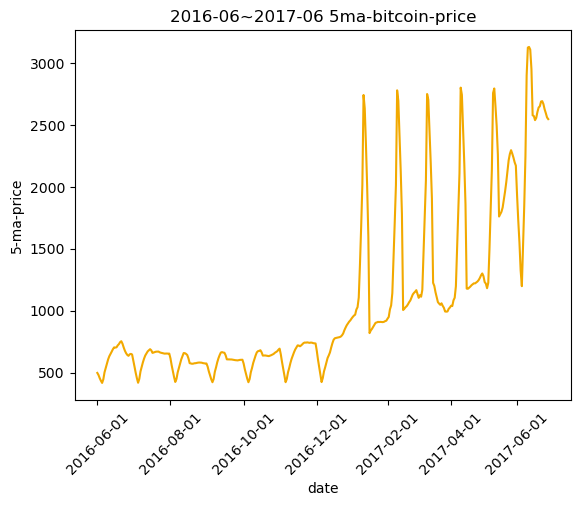

In [125]:
plt.title("2016-06~2017-06 5ma-bitcoin-price")
plt.plot(df['Date'],df['5-ma'],color = '#f2a900')
plt.xlabel('date')
plt.ylabel('5-ma-price')
# x축 눈금이 겹치는 문제를 해결하기 위해 45기울이는 작업 진행
plt.xticks(['2016-06-01','2016-08-01','2016-10-01','2016-12-01','2017-02-01',
            '2017-04-01','2017-06-01'],rotation = 45)
plt.show()

### Bonus Part

- 위에 주어진 데이터와 더불어 다음 데이터도 주어졌을 때, 2016.6 ~ 2017.6 기간에 해당하는 비트코인의 5-MA 그래프와 이더리움의 5-MA 그래프를 동시에 그려주세요.

    -선의 색깔은 비트코인 : 노란색(#f2a900), 이더리움 : 검은색(#3c3c3d) 으로 해야합니다.

    -x-axis label과 y-axis label은 적절한 텍스트로 추가되어야 합니다.

    -이동평균의 기준은 Open Column으로 계산합니다.

    -이외에도 그래프를 알아보기 쉽게 하기 위한 정보(Text, Facet 등)을 추가하는 것도 좋습니다.

In [142]:
eth = pd.read_csv('./eth/ETH_DAY.csv')
eth = eth.sort_values(by = 'Date').reset_index(drop=True)
eth

,Date,Symbol,Open,High,Low,Close,Volume ETH,Volume USD
0,2016-05-09,ETHUSD,12.00,12.00,9.36,9.98,1317.90,12885.06
1,2016-05-10,ETHUSD,9.98,9.98,9.36,9.68,672.06,6578.20
2,2016-05-11,ETHUSD,9.68,10.47,9.68,10.43,3052.51,30978.11
3,2016-05-12,ETHUSD,10.43,12.00,9.92,10.20,2072.56,22183.39
4,2016-05-13,ETHUSD,10.20,11.59,10.20,10.69,1769.71,18923.55
...,...,...,...,...,...,...,...,...
1433,2020-04-11,ETHUSD,158.26,161.49,154.25,158.66,13761.72,2172914.57
1434,2020-04-12,ETHUSD,158.66,165.37,155.21,158.56,12877.33,2082804.05
1435,2020-04-13,ETHUSD,158.56,159.51,150.12,156.97,15698.32,2416728.28
1436,2020-04-14,ETHUSD,156.97,162.15,155.74,158.61,18061.58,2872210.44


In [143]:
eth.tail(20)

,Date,Symbol,Open,High,Low,Close,Volume ETH,Volume USD
1418,2020-03-27,ETHUSD,136.98,142.38,130.00,131.79,16016.63,2183286.58
1419,2020-03-28,ETHUSD,131.79,133.45,124.70,131.27,19399.49,2498254.45
1420,2020-03-29,ETHUSD,131.27,132.00,123.87,124.50,9427.22,1193206.91
1421,2020-03-30,ETHUSD,124.50,135.56,124.09,132.36,29171.17,3849322.17
1422,2020-03-31,ETHUSD,132.36,135.40,130.77,133.42,15514.29,2059448.42
1423,2020-04-01,ETHUSD,133.42,137.33,128.93,136.00,18294.09,2419198.20
1424,2020-04-02,ETHUSD,136.00,150.32,135.55,141.56,34902.18,4939600.30
1425,2020-04-03,ETHUSD,141.56,146.87,137.85,141.46,25410.75,3627551.56
1426,2020-04-04,ETHUSD,141.46,146.50,138.82,144.73,19744.24,2792318.57
1427,2020-04-05,ETHUSD,144.73,145.80,141.00,143.04,7986.14,1144709.14


In [144]:
eth['5-ma'] = 0
for i in range(len(eth) - 4):
    eth['5-ma'].loc[4+i,] = (eth['Open'].loc[i,]+eth['Open'].loc[i+1,]+eth['Open'].loc[i+2,]+eth['Open'].loc[i+3,]+eth['Open'].loc[i+4,])/5
eth

C:\Users\User\AppData\Local\Temp\ipykernel_23792\3890152776.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eth['5-ma'].loc[4+i,] = (eth['Open'].loc[i,]+eth['Open'].loc[i+1,]+eth['Open'].loc[i+2,]+eth['Open'].loc[i+3,]+eth['Open'].loc[i+4,])/5


,Date,Symbol,Open,High,Low,Close,Volume ETH,Volume USD,5-ma
0,2016-05-09,ETHUSD,12.00,12.00,9.36,9.98,1317.90,12885.06,0.000
1,2016-05-10,ETHUSD,9.98,9.98,9.36,9.68,672.06,6578.20,0.000
2,2016-05-11,ETHUSD,9.68,10.47,9.68,10.43,3052.51,30978.11,0.000
3,2016-05-12,ETHUSD,10.43,12.00,9.92,10.20,2072.56,22183.39,0.000
4,2016-05-13,ETHUSD,10.20,11.59,10.20,10.69,1769.71,18923.55,10.458
...,...,...,...,...,...,...,...,...,...
1433,2020-04-11,ETHUSD,158.26,161.49,154.25,158.66,13761.72,2172914.57,167.818
1434,2020-04-12,ETHUSD,158.66,165.37,155.21,158.56,12877.33,2082804.05,165.252
1435,2020-04-13,ETHUSD,158.56,159.51,150.12,156.97,15698.32,2416728.28,164.024
1436,2020-04-14,ETHUSD,156.97,162.15,155.74,158.61,18061.58,2872210.44,160.722


In [145]:
eth = eth[('2016-05-31' < eth['Date']) & (eth['Date'] < '2017-07-01')]

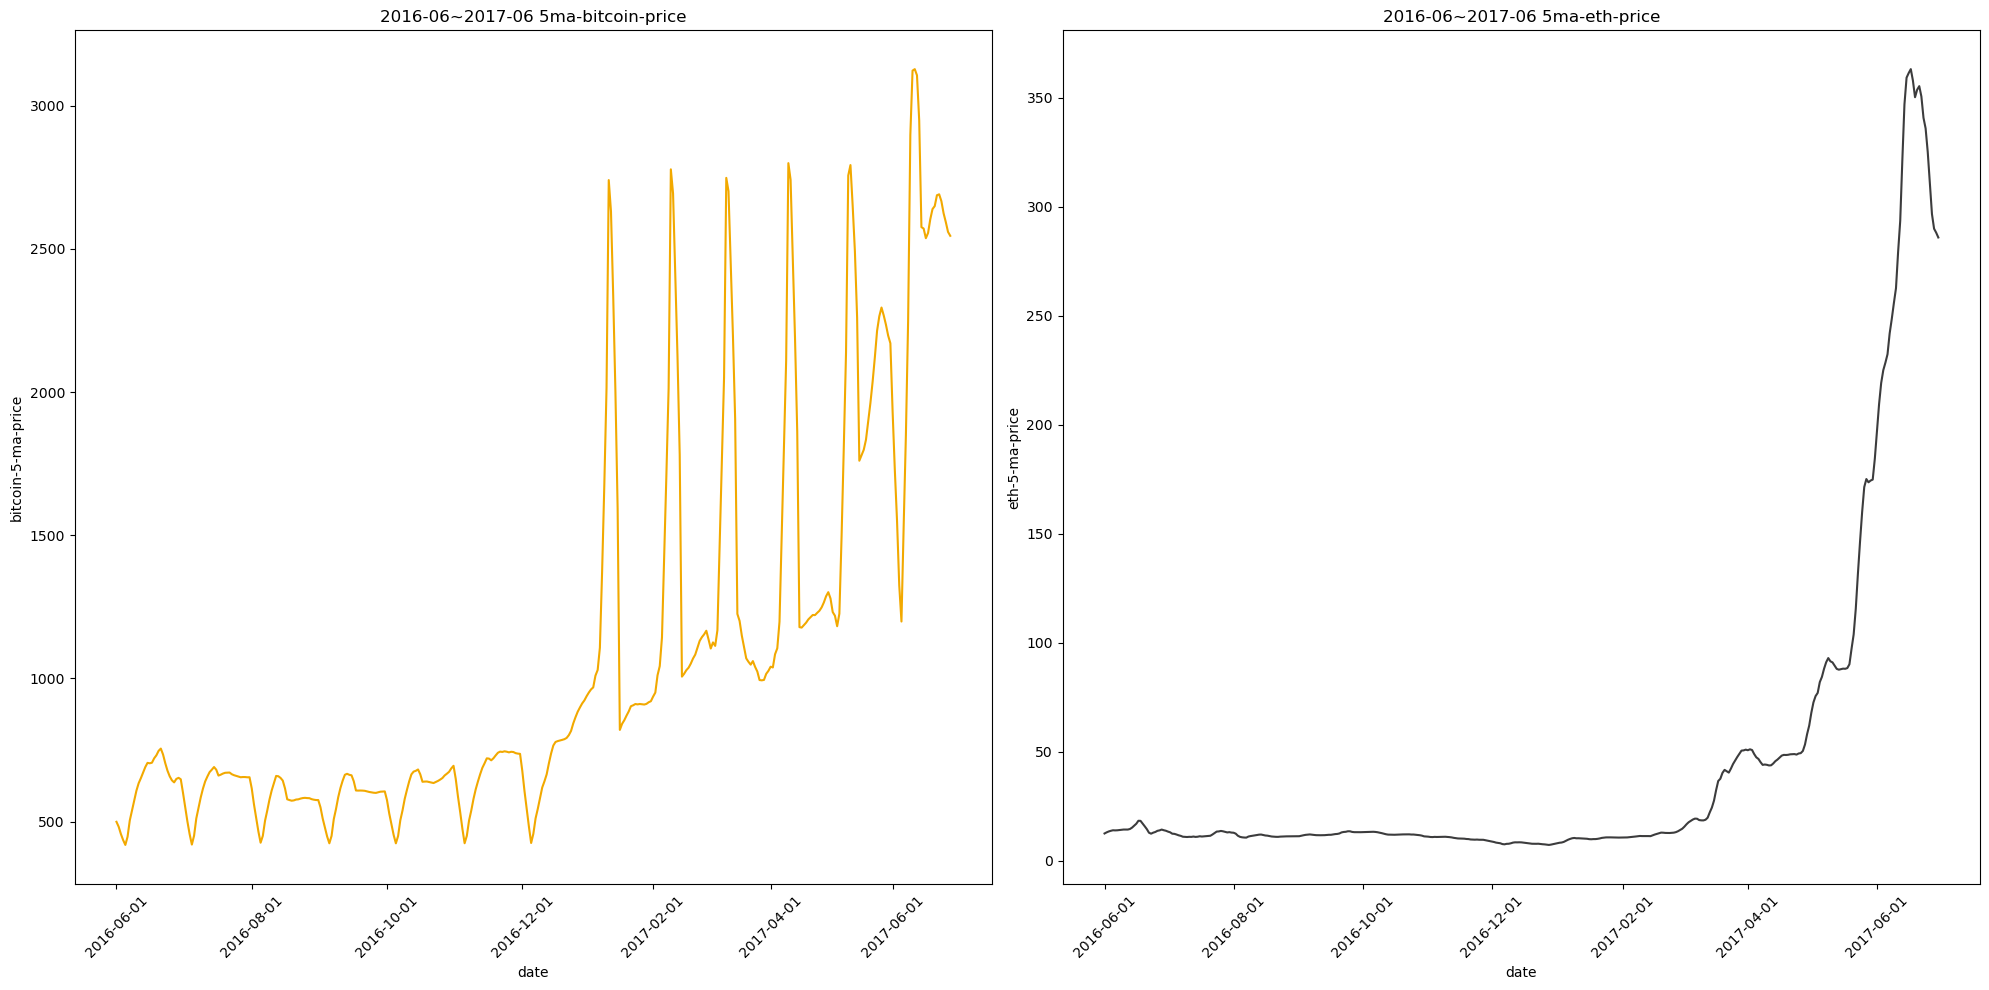

In [148]:
plt.figure(figsize = (20,10))

plt.subplot(1,2,1)
plt.title('2016-06~2017-06 5ma-bitcoin-price')
plt.plot(df['Date'],df['5-ma'],color = '#f2a900')
plt.xlabel('date')
plt.ylabel('bitcoin-5-ma-price')
plt.xticks(['2016-06-01','2016-08-01','2016-10-01','2016-12-01','2017-02-01',
            '2017-04-01','2017-06-01'],rotation = 45)

plt.subplot(1,2,2)
plt.title('2016-06~2017-06 5ma-eth-price')
plt.plot(eth['Date'],eth['5-ma'],color = '#3c3c3d')
plt.xlabel('date')
plt.ylabel('eth-5-ma-price')
plt.xticks(['2016-06-01','2016-08-01','2016-10-01','2016-12-01','2017-02-01',
            '2017-04-01','2017-06-01'],rotation = 45)
plt.tight_layout()

plt.show()